# Steps in building a machine learning model

1. Get the Data 

2. Take a Quick Look at the Data 

3. Split the Data (Train/Validation/Test) 

4. Data Analysis (Exploratory Data Analysis or EDA) 

5. Prepare the Data for Machine Learning  

6. Select and Train a Model  

7. Evaluate the Model 

8. Fine-Tune the Model 

9. Select a final model

10. Deployment

_Step 1-9 would be done in this notebook step 10 would be done in the [deployment folder](../deployment/)_


1. **Get the Data**  
   - Gather the dataset from relevant sources (e.g., Kaggle, databases, APIs, etc.) _check the [data folder](../data/) for more details about the dataset._  
   - Here we would just load the data using pandas. so first we have to import the necessary dependencies

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize, LabelEncoder

In [8]:
data_list = ["../data/INCART_Arrhythmia.csv", "../data/MIT-BIH Arrhythmia Database.csv", "../data/MIT-BIH Supraventricular Arrhythmia Database.csv", ]

In [9]:
dataframes = []

for data in data_list:
    doc = pd.read_csv(data)
    dataframes.append(doc)

df = pd.concat(dataframes)

In [10]:
df.reset_index(drop=True)

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,I01,N,163.0,165.0,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,I01,N,165.0,166.0,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,I01,N,166.0,102.0,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,I01,VEB,102.0,231.0,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,I01,N,231.0,165.0,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460841,894,N,102.0,96.0,0.011782,-0.702667,2.537575,-1.717832,-0.019031,15,...,-0.366454,2,6,12,4,-0.366454,-0.366454,-0.366454,-0.489696,-0.489696
460842,894,N,96.0,27.0,0.151691,-1.074162,2.549375,-1.553742,0.028627,14,...,-0.489704,2,6,12,4,-0.489704,-0.489704,-0.489704,-0.710598,-0.710598
460843,894,N,79.0,96.0,0.037697,0.402691,2.431716,-1.536314,0.032153,14,...,-0.225756,2,1,6,3,-0.225756,-0.225756,-0.225756,-0.505484,-0.505484
460844,894,N,96.0,59.0,-0.021873,-0.301590,2.621748,-1.815166,-0.025689,17,...,-0.367450,3,4,11,4,-0.367450,-0.367450,-0.326364,-0.326364,-0.423273


2. **Take a Quick Look at the Data**  
   - Perform initial exploration of the dataset (e.g., inspect the data types, check for missing values, and view a few records).
   - This helps to understand what you’re working with.

In [11]:
df.columns

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

In [12]:
df.describe()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,460846.000000,460846.000000,460846.000000,460846.000000,460846.000000,460846.000000,460846.000000,460846.000000,460846.000000,460846.000000,...,460846.000000,460846.000000,460846.000000,460846.000000,460846.000000,460846.000000,460846.000000,460846.000000,460846.000000,460846.000000
mean,174.865743,174.687371,0.057071,0.313997,0.770446,-0.573864,-0.171008,16.366441,7.481901,35.881017,...,-0.210615,9.762337,6.497042,25.554704,9.295324,-0.210615,-0.208974,-0.203898,-0.211440,-0.396215
std,90.811243,90.470886,0.215339,0.708560,0.908546,0.849811,0.359395,12.856333,7.440237,29.183723,...,0.324284,9.231505,7.078731,15.440145,6.858505,0.324284,0.343416,0.463562,0.576825,0.559928
min,1.000000,0.000000,-4.208601,-7.959463,-7.113196,-7.971319,-7.113196,0.000000,1.000000,3.000000,...,-6.461754,0.000000,1.000000,2.000000,1.000000,-6.461754,-4.913302,-4.398122,-4.069726,-4.520327
25%,103.000000,103.000000,-0.051147,-0.152951,0.065487,-1.006093,-0.184389,8.000000,3.000000,17.000000,...,-0.297973,4.000000,3.000000,16.000000,5.000000,-0.297973,-0.320037,-0.455752,-0.585069,-0.732129
50%,154.000000,155.000000,0.012046,0.114319,0.846358,-0.610891,-0.094343,15.000000,5.000000,27.000000,...,-0.093049,7.000000,4.000000,22.000000,8.000000,-0.093049,-0.097158,-0.095323,-0.104425,-0.322754
75%,236.000000,236.000000,0.119416,0.662932,1.384266,-0.231138,-0.028868,22.000000,9.000000,44.000000,...,-0.013809,13.000000,8.000000,31.000000,11.000000,-0.013809,0.003845,0.065522,0.115733,-0.035853
max,2114.000000,2114.000000,10.565904,4.738824,4.598265,4.018918,3.129033,170.000000,150.000000,334.000000,...,4.033554,260.000000,185.000000,412.000000,215.000000,4.033554,3.585718,4.040094,3.755566,3.575504


In [13]:
df.isnull().sum()

record            0
type              0
0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460846 entries, 0 to 184427
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          460846 non-null  object 
 1   type            460846 non-null  object 
 2   0_pre-RR        460846 non-null  float64
 3   0_post-RR       460846 non-null  float64
 4   0_pPeak         460846 non-null  float64
 5   0_tPeak         460846 non-null  float64
 6   0_rPeak         460846 non-null  float64
 7   0_sPeak         460846 non-null  float64
 8   0_qPeak         460846 non-null  float64
 9   0_qrs_interval  460846 non-null  int64  
 10  0_pq_interval   460846 non-null  int64  
 11  0_qt_interval   460846 non-null  int64  
 12  0_st_interval   460846 non-null  int64  
 13  0_qrs_morph0    460846 non-null  float64
 14  0_qrs_morph1    460846 non-null  float64
 15  0_qrs_morph2    460846 non-null  float64
 16  0_qrs_morph3    460846 non-null  float64
 17  0_qrs_morph4   

In [14]:
df.dtypes

record             object
type               object
0_pre-RR          float64
0_post-RR         float64
0_pPeak           float64
0_tPeak           float64
0_rPeak           float64
0_sPeak           float64
0_qPeak           float64
0_qrs_interval      int64
0_pq_interval       int64
0_qt_interval       int64
0_st_interval       int64
0_qrs_morph0      float64
0_qrs_morph1      float64
0_qrs_morph2      float64
0_qrs_morph3      float64
0_qrs_morph4      float64
1_pre-RR          float64
1_post-RR         float64
1_pPeak           float64
1_tPeak           float64
1_rPeak           float64
1_sPeak           float64
1_qPeak           float64
1_qrs_interval      int64
1_pq_interval       int64
1_qt_interval       int64
1_st_interval       int64
1_qrs_morph0      float64
1_qrs_morph1      float64
1_qrs_morph2      float64
1_qrs_morph3      float64
1_qrs_morph4      float64
dtype: object

In [15]:
df.duplicated().sum()

np.int64(0)

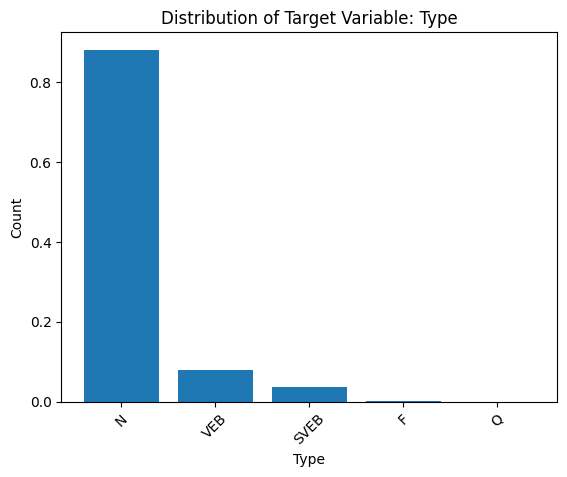

In [16]:
type_counts = df['type'].value_counts(normalize=True)

# Bar plot
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Target Variable: Type')
plt.xticks(rotation=45) 
plt.show()

from the above quick analysis we know that there are no missing data, the datatypes for the columns are either int or floats no categorical variable except the target and the record which we are going to drop when building a model. We also saw that the target variabe _`type`_ has a class imbalance, which we would also try to solve by using stratified sampling and using class weights when training the model

3. **Split the Data (Train/Validation/Test)**  
   - Split the data into training, validation, and test sets to evaluate the model’s performance.
   - A typical split might be 60% training, 20% validation, and 20% testing, though it can vary.

In [17]:
y = df.type
X = df.drop(columns=['type', 'record'])

In [18]:
from sklearn.model_selection import train_test_split


X_full_train, X_test, y_full_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [20]:
X_full_train = X_full_train.reset_index(drop=True)
y_full_train = y_full_train.reset_index(drop=True)

X_train, X_val, y_train, y_val = train_test_split(
    X_full_train, y_full_train, test_size=0.25, stratify=y_full_train, random_state=42
)

In [21]:
X_full_train.shape, X_train.shape, X_val.shape, X_test.shape

((368676, 32), (276507, 32), (92169, 32), (92170, 32))

In [22]:
y_full_train.shape, y_train.shape, y_val.shape, y_test.shape

((368676,), (276507,), (92169,), (92170,))

4. **Data Analysis (Exploratory Data Analysis or EDA)**  
   - Use statistical and visualization techniques to understand the data better.
   - This includes checking distributions, correlations, and trends, as well as identifying outliers.

In [23]:
corr = df.select_dtypes(include="float64").corr()

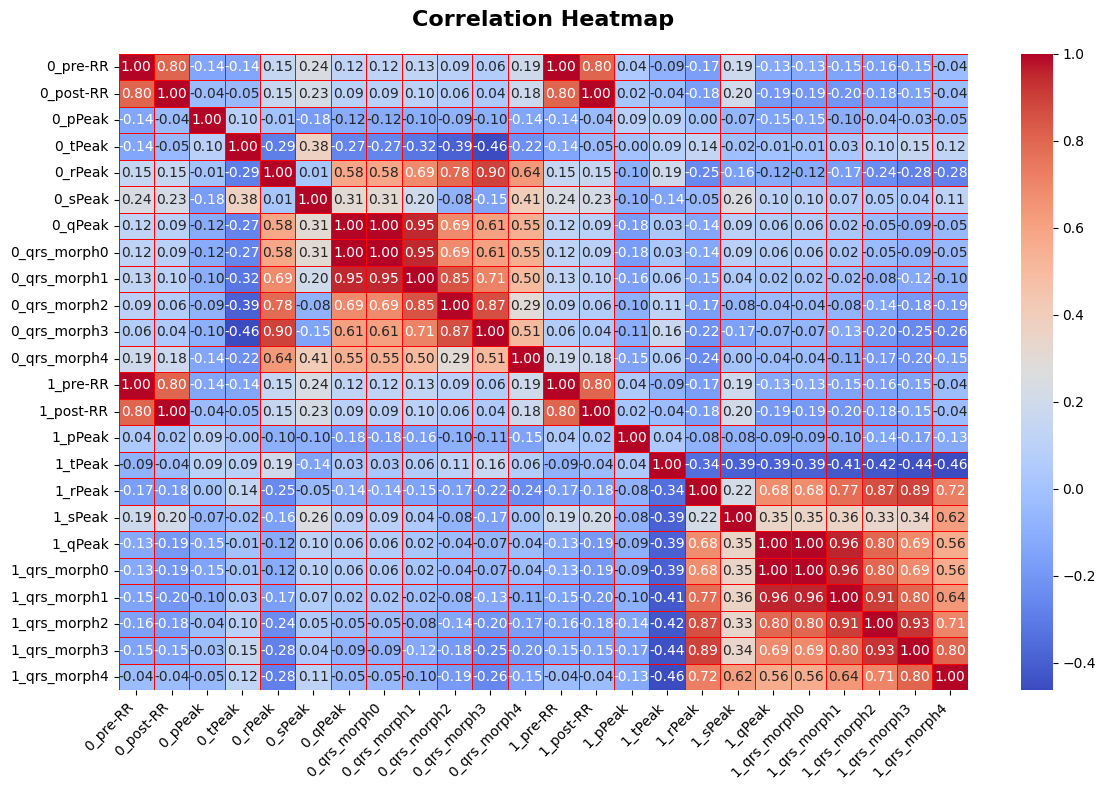

In [24]:
plt.figure(figsize=(12, 8))  
sns.heatmap(
    corr, 
    annot=True,           
    fmt=".2f",            
    cmap="coolwarm",       
    linewidths=0.5,        
    linecolor='red',     
    cbar=True,             
)

plt.title("Correlation Heatmap", fontsize=16, weight='bold', pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.yticks(fontsize=10)                          
plt.tight_layout()                               
plt.show()

It looks like some of the columns have a high correlation with each other but since we are going to be using tree-based algorithm we can ignore them they are not affected by multicolinearity

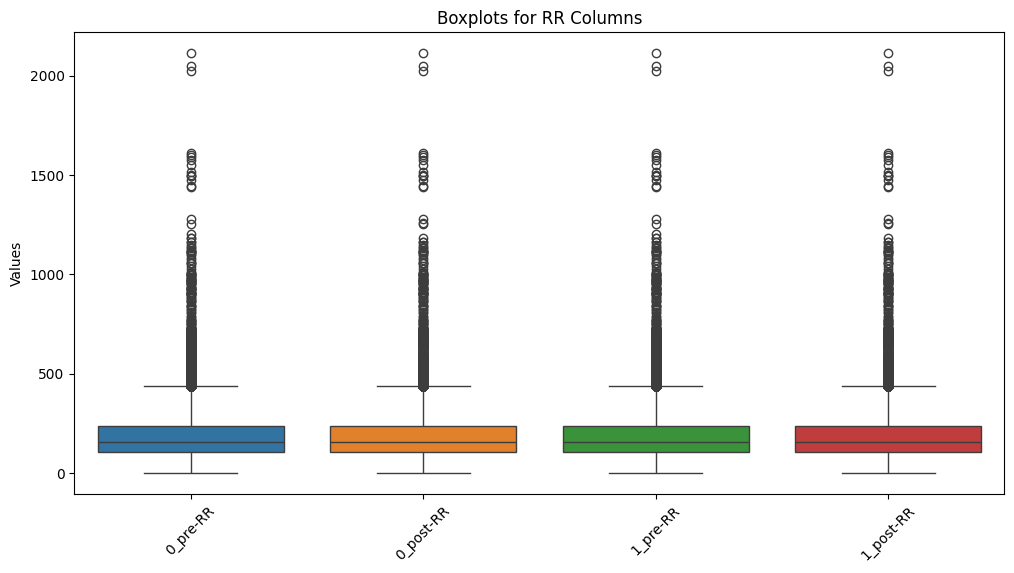

In [27]:
# the max values for 0_pre-RR , 0_post-RR ,  1_pre-RR and 1_post-RR are quite high lets see if there are any outlier
columns_to_check = ['0_pre-RR', '0_post-RR', '1_pre-RR', '1_post-RR']

# Create boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_check])
plt.title("Boxplots for RR Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()


In [28]:
# Calculate mutual information scores with the target variable
mutual_info = mutual_info_classif(X_train, y_train, discrete_features=False, random_state=42)

# Create a DataFrame for better visualization
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Info Score': mutual_info
}).sort_values(by='Mutual Info Score', ascending=False)

# Display the scores
print(mutual_info_df)

           Feature  Mutual Info Score
0         0_pre-RR           0.081107
16        1_pre-RR           0.081071
5          0_sPeak           0.075724
3          0_tPeak           0.058916
25   1_qt_interval           0.052084
7   0_qrs_interval           0.051283
10   0_st_interval           0.050830
15    0_qrs_morph4           0.049347
2          0_pPeak           0.047743
24   1_pq_interval           0.047071
4          0_rPeak           0.045707
26   1_st_interval           0.041948
20         1_rPeak           0.041831
6          0_qPeak           0.041553
11    0_qrs_morph0           0.041551
9    0_qt_interval           0.041156
19         1_tPeak           0.038787
14    0_qrs_morph3           0.035140
12    0_qrs_morph1           0.034195
18         1_pPeak           0.032017
29    1_qrs_morph2           0.031903
27    1_qrs_morph0           0.031410
22         1_qPeak           0.031410
1        0_post-RR           0.030740
17       1_post-RR           0.030590
28    1_qrs_

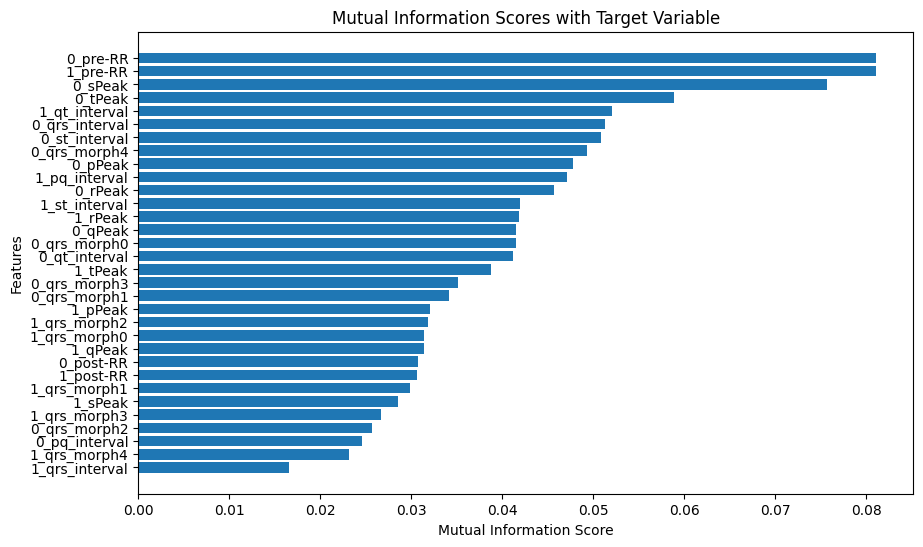

In [30]:
# Plot mutual information scores
plt.figure(figsize=(10, 6))
plt.barh(mutual_info_df['Feature'], mutual_info_df['Mutual Info Score'])
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores with Target Variable')
plt.gca().invert_yaxis()
plt.show()

In [31]:
# Function to calculate IQR and detect outliers
def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

outliers = detect_outliers_iqr(X_train, columns_to_check)

# Display the number of outliers in each column
for col, outlier_data in outliers.items():
    print(f"{col}: {len(outlier_data)} outliers detected")

0_pre-RR: 1959 outliers detected
0_post-RR: 1828 outliers detected
1_pre-RR: 1959 outliers detected
1_post-RR: 1828 outliers detected


In [32]:
# Remove the outliers from X_train and y_train
for col, outlier_data in outliers.items():
    X_train = X_train[~X_train.index.isin(outlier_data.index)]
    y_train = y_train[~y_train.index.isin(outlier_data.index)]

5. **Prepare the Data for Machine Learning**  
   - Clean the data (e.g., handling missing values, scaling, normalization, encoding categorical variables).
   - Feature engineering may also be needed (e.g., creating new features from existing ones).

I don't think there is nothing much to do here most of the things required have been done in the steps above

6. **Select and Train a Model**

The models trained are: 
- LogisticRegression model
- RandomForestClassifier
- XGBClassifier

The XGBClassifier has the best AUC of : 0.9910

In [33]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [36]:
# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=4000, multi_class='multinomial', solver='lbfgs', class_weight='balanced')
logreg.fit(X_train, y_train_encoded)

# Make predictions on the validation set
y_pred_encoded = logreg.predict(X_val)
logreg_probs = logreg.predict_proba(X_val) 

# Evaluate the model's performance
accuracy = accuracy_score(y_val_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("Classification Report:")
print(classification_report(y_val_encoded, y_pred_encoded))

# Calculate and display ROC AUC for multiclass
y_val_binarized = label_binarize(y_val_encoded, classes=list(range(5)))
auc_score = roc_auc_score(y_val_binarized, logreg_probs, average="macro", multi_class="ovr")
print(f"Multiclass ROC AUC Score: {auc_score:.4f}")

/root/.local/share/virtualenvs/ECG-Arrhythmia-Classifier-fcqqu0k5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/root/.local/share/virtualenvs/ECG-Arrhythmia-Classifier-fcqqu0k5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6992
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.79      0.04       209
           1       0.99      0.70      0.82     81165
           2       0.00      0.50      0.00        20
           3       0.16      0.65      0.26      3386
           4       0.78      0.67      0.72      7389

    accuracy                           0.70     92169
   macro avg       0.39      0.66      0.37     92169
weighted avg       0.94      0.70      0.79     92169

Multiclass ROC AUC Score: 0.8830


In [37]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train_encoded)

# Make predictions on the validation set
y_pred_encoded = rf.predict(X_val)
rf_probs = rf.predict_proba(X_val)  # For probabilities

# Evaluate the model's performance
accuracy = accuracy_score(y_val_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("Classification Report:")
print(classification_report(y_val_encoded, y_pred_encoded))

# Calculate and display ROC AUC for multiclass
y_val_binarized = label_binarize(y_val_encoded, classes=list(range(5)))
auc_score = roc_auc_score(y_val_binarized, rf_probs, average="macro", multi_class="ovr")
print(f"Multiclass ROC AUC Score: {auc_score:.4f}")

Accuracy: 0.9847
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.63      0.74       209
           1       0.99      1.00      0.99     81165
           2       0.00      0.00      0.00        20
           3       0.94      0.77      0.85      3386
           4       0.98      0.95      0.97      7389

    accuracy                           0.98     92169
   macro avg       0.76      0.67      0.71     92169
weighted avg       0.98      0.98      0.98     92169

Multiclass ROC AUC Score: 0.9345


/root/.local/share/virtualenvs/ECG-Arrhythmia-Classifier-fcqqu0k5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/.local/share/virtualenvs/ECG-Arrhythmia-Classifier-fcqqu0k5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/.local/share/virtualenvs/ECG-Arrhythmia-Classifier-fcqqu0k5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

In [38]:
# Create an XGBoost model instance
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  
    num_class=5,               
    max_depth=6,                
    learning_rate=0.1,          
    n_estimators=100,          
    random_state=42
)

# Fit the model on the training data
xgb_model.fit(X_train, y_train_encoded)

# Make predictions on the validation set
y_pred_encoded = xgb_model.predict(X_val)
xgb_probs = xgb_model.predict_proba(X_val)  # For probabilities

# Evaluate the model's performance
accuracy = accuracy_score(y_val_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("Classification Report:")
print(classification_report(y_val_encoded, y_pred_encoded))

# Calculate and display ROC AUC for multiclass
y_val_binarized = label_binarize(y_val_encoded, classes=list(range(5)))
auc_score = roc_auc_score(y_val_binarized, xgb_probs, average="macro", multi_class="ovr")
print(f"Multiclass ROC AUC Score: {auc_score:.4f}")

Accuracy: 0.9818
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       209
           1       0.99      1.00      0.99     81165
           2       0.00      0.00      0.00        20
           3       0.88      0.77      0.82      3386
           4       0.97      0.94      0.96      7389

    accuracy                           0.98     92169
   macro avg       0.74      0.66      0.69     92169
weighted avg       0.98      0.98      0.98     92169

Multiclass ROC AUC Score: 0.9855


The xgboost model has the best AUC score so we would try to tune the hyperparameter for the model

### Hyperparameter tuning

In [39]:
# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost model for multiclass classification
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=3, 
                           verbose=1,
                           n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train_encoded)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
y_pred_proba = best_model.predict_proba(X_val)  # Predict probabilities for AUC calculation

# Calculate accuracy of the best model on validation set
accuracy = accuracy_score(y_val_encoded, y_pred)
print(f"Accuracy with tuned model: {accuracy:.4f}")

# Calculate the AUC score for multiclass classification (one-vs-rest)
auc_score = roc_auc_score(y_val_encoded, y_pred_proba, multi_class='ovr', average='macro')
print(f"AUC Score with tuned model: {auc_score:.4f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}
Best Accuracy: 0.9869886502962956
Accuracy with tuned model: 0.9876
AUC Score with tuned model: 0.9886


evaluate the best model on the test dataset and also train with the full training set

In [40]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_full_train)
y_test_encoded = label_encoder.transform(y_test)


xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  
    num_class=5,                
    max_depth=10,                
    learning_rate=0.2,         
    n_estimators=200, 
    colsample_bytree= 0.8,
    subsample= 1.0,
    random_state=42
)

# Fit the model on the training data
xgb_model.fit(X_full_train, y_train_encoded)

# Make predictions on the validation set
y_pred_encoded = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)  # For probabilities

# Evaluate the model's performance
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_encoded))

# Calculate and display ROC AUC for multiclass
y_test_binarized = label_binarize(y_test_encoded, classes=list(range(5)))
auc_score = roc_auc_score(y_test_binarized, xgb_probs, average="macro", multi_class="ovr")
print(f"Multiclass ROC AUC Score: {auc_score:.4f}")

Accuracy: 0.9883
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.77       209
           1       0.99      1.00      0.99     81166
           2       0.00      0.00      0.00        20
           3       0.91      0.86      0.88      3386
           4       0.98      0.97      0.98      7389

    accuracy                           0.99     92170
   macro avg       0.76      0.70      0.73     92170
weighted avg       0.99      0.99      0.99     92170

Multiclass ROC AUC Score: 0.9910


/root/.local/share/virtualenvs/ECG-Arrhythmia-Classifier-fcqqu0k5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/.local/share/virtualenvs/ECG-Arrhythmia-Classifier-fcqqu0k5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/.local/share/virtualenvs/ECG-Arrhythmia-Classifier-fcqqu0k5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

9. **Select a final model**

here we would save the best model which we would use for deployment

In [61]:
with open('model.pkl', 'wb') as f_out:
    pickle.dump(xgb_model, f_out)